In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets

from matplotlib import pyplot as plt

In [2]:
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()

x_train = x_train/255
x_test = x_test/255

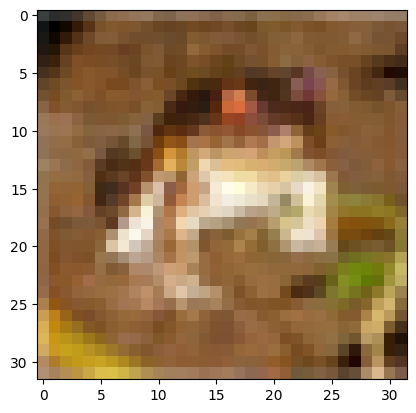

In [3]:
plt.imshow(x_train[0])

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
model = Sequential()

model.add( Conv2D(filters=32,activation='relu',kernel_size=(3,3),input_shape=(32,32,3)) )
model.add(MaxPooling2D((2,2)) )

model.add( Conv2D(filters=64,activation='relu',kernel_size=(3,3)) )
model.add(MaxPooling2D((2,2)) )

model.add( Conv2D(filters=64,activation='relu',kernel_size=(3,3)) )
model.add(MaxPooling2D((2,2)) )

#ann
model.add(Flatten())
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=10,activation='softmax'))



In [6]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [7]:
history = model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10


1563/1563 [==============================] - 15s 9ms/step - loss: 1.5147 - accuracy: 0.4430 - val_loss: 1.3025 - val_accuracy: 0.5363
Epoch 2/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1730 - accuracy: 0.5840 - val_loss: 1.1150 - val_accuracy: 0.6089
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.0365 - accuracy: 0.6338 - val_loss: 1.0120 - val_accuracy: 0.6497
Epoch 4/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.9530 - accuracy: 0.6671 - val_loss: 0.9532 - val_accuracy: 0.6684
Epoch 5/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.8839 - accuracy: 0.6901 - val_loss: 0.9505 - val_accuracy: 0.6724
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8290 - accuracy: 0.7117 - val_loss: 0.9273 - val_accuracy: 0.6811
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7870 - accuracy: 0.7260 - val_loss: 0.9128 - val_

In [8]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.8836 - accuracy: 0.7026


[0.8836222887039185, 0.7026000022888184]

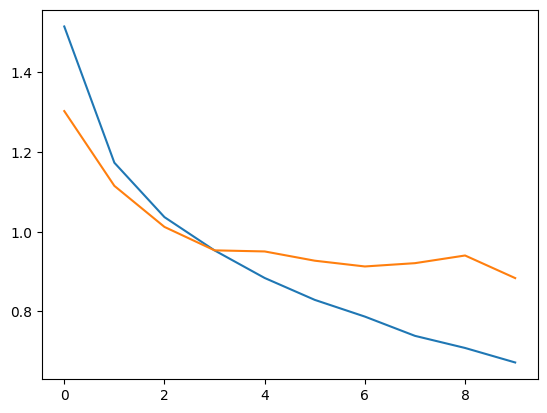

In [9]:
plt.plot( history.history['loss'])
plt.plot(history.history['val_loss'])